In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from datetime import datetime 

import warnings
warnings.filterwarnings('ignore')

## 1. Tiền xử lý dữ liệu

In [120]:
train_df = pd.read_csv('clean_data.csv')
train_df_temp = train_df.copy()
train_df_temp.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date
0,478324,Cho thuê phòng để ở tại 108/64A1 Trần Quang Di...,3.5,18.0,Quận 3,Hồ Chí Minh,20/06/2020
1,728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.3,25.0,Quận 7,Hồ Chí Minh,17/10/2018
2,781296,Cần share lại gấp phòng trọ mới thuê tại đường...,3.0,15.0,Quận 10,Hồ Chí Minh,05/10/2018
3,781448,Chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7.0,27.0,Tân Bình,Hồ Chí Minh,06/10/2018
4,789361,"Phòng cho thuê giá rẻ, Quận Gò Vấp gần chung c...",1.7,12.0,Gò Vấp,Hồ Chí Minh,09/10/2018


### 1.1 Bỏ đi những cột không cần thiết

In [121]:
train_df_temp.drop('City', axis= 1, inplace = True)
train_df_temp.drop('Date', axis= 1, inplace = True)

### 1.2 Tạo thêm đặc trưng cho bảng dữ liệu 
> Dựa vào đặc trưng: 'Title' để tạo thêm 6 đặc trưng: isNew(phòng mới hay cũ) , hasFurniture (có nội thất không), liveTogether(ở ghép/ktx), isWholeHouse (có phải nhà nguyên căn không), isApartment (có phải căn hộ không), isNearCenter (có gần trung tâm không)

In [122]:
def isWholeHouse(df):
    df["Title"] = df["Title"].str.lower()
    e = ['nguyên']
    df['isWholeHouse'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [123]:
def isLiveTogether(df):
    df["Title"] = df["Title"].str.lower()
    e = ['ghép','share',"ktx",'túc']
    df['isLiveTogether'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [124]:
def isApartment(df):
    df["Title"] = df["Title"].str.lower()
    e = ['hộ','cư', 'chdv']
    df['isApartment'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [125]:
def isNew(df):
    df["Title"] = df["Title"].str.lower()
    e = ['mới', 'vừa', 'xây']
    df['isNew'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [126]:
def isNearCenter(df):
    df["Title"] = df["Title"].str.lower()
    e = ['tâm', 'tam']
    df['isNearCenter'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [127]:
def hasFurniture(df):
    df["Title"] = df["Title"].str.lower()
    e = ['nội thất', 'noi that', 'tiện nghi','tiện ích','cao cấp','cao cap','hiện đại','hien dai']
    df['hasFurniture'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [128]:
train_df_temp = isNew(train_df_temp)
train_df_temp = isNearCenter(train_df_temp)
train_df_temp = hasFurniture(train_df_temp)
train_df_temp = isWholeHouse(train_df_temp)
train_df_temp = isLiveTogether(train_df_temp)
train_df_temp = isApartment(train_df_temp)

In [129]:
train_df_temp.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,isNew,isNearCenter,hasFurniture,isWholeHouse,isLiveTogether,isApartment
0,478324,cho thuê phòng để ở tại 108/64a1 trần quang di...,3.5,18.0,Quận 3,no,no,no,no,no,no
1,728993,phòng vừa xây xong thoáng mát gần các trường đ...,3.3,25.0,Quận 7,yes,no,no,no,no,no
2,781296,cần share lại gấp phòng trọ mới thuê tại đường...,3.0,15.0,Quận 10,yes,no,no,no,yes,no
3,781448,chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7.0,27.0,Tân Bình,no,no,no,no,no,yes
4,789361,"phòng cho thuê giá rẻ, quận gò vấp gần chung c...",1.7,12.0,Gò Vấp,no,no,no,no,no,yes


In [130]:
train_df_temp.shape

(1142, 11)

### 1.3 Xác định biến Categorical/Numeric

In [131]:
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1142 non-null   int64  
 1   Title               1142 non-null   object 
 2   Price(Triệu/tháng)  1142 non-null   float64
 3   Square(m²)          1142 non-null   float64
 4   District            1142 non-null   object 
 5   isNew               1142 non-null   object 
 6   isNearCenter        1142 non-null   object 
 7   hasFurniture        1142 non-null   object 
 8   isWholeHouse        1142 non-null   object 
 9   isLiveTogether      1142 non-null   object 
 10  isApartment         1142 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 98.3+ KB


In [132]:
# Biến Categorical
cat_vars = ['District', 'isNew', 'hasFurniture', 'isLiveTogether','isNearCenter','isWholeHouse','isApartment']
# Biến numerical
num_vars = ['Price(Triệu/tháng)', 'Square(m²)']

Với biến numerical, nhóm dùng distplot để vẽ biểu đồ phân bố của 2 đặc trưng: Price và Square để quan sát

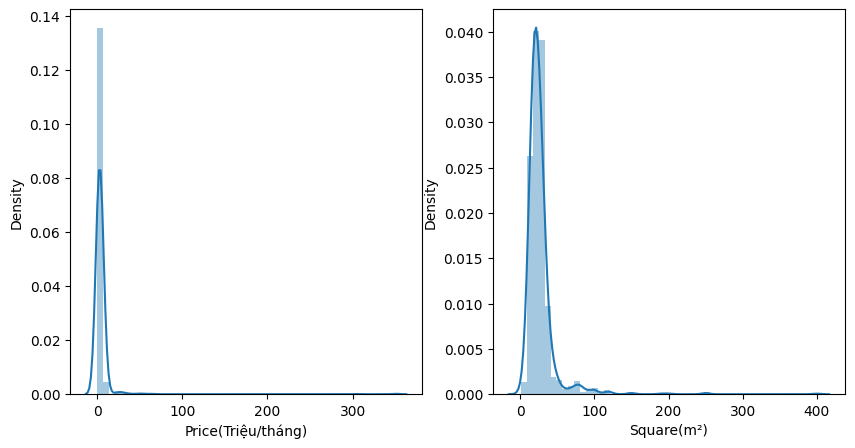

In [133]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
sns.distplot(train_df_temp[num_vars[0]])
plt.subplot(122)
sns.distplot(train_df_temp[num_vars[1]])
plt.show()

Ta thấy ở thuộc tính giá dữ liệu tập trung dưới 10 triệu và ở diện tích dữ liệu tập trung dưới 100 triệu nên ta sẽ loại những dòng trên 10 triệu (giá) và 100 m^2 (Diện tích)

In [134]:
train_df_temp.drop(train_df_temp[train_df_temp['Price(Triệu/tháng)'] > 10].index, inplace = True)
train_df_temp.drop(train_df_temp[train_df_temp['Square(m²)'] > 100].index, inplace = True)


In [135]:
train_df_temp.describe()

,Id,Price(Triệu/tháng),Square(m²)
count,1.109000e+03,1109.000000,1109.000000
mean,1.509160e+06,3.220790,24.238548
std,3.378553e+05,1.673252,11.340440
min,4.783240e+05,0.002000,1.000000
25%,1.443570e+06,2.000000,18.000000
50%,1.561906e+06,3.000000,22.000000
75%,1.740950e+06,4.000000,30.000000
max,2.130491e+06,10.000000,100.000000


### 1.4 Loại bỏ outliers

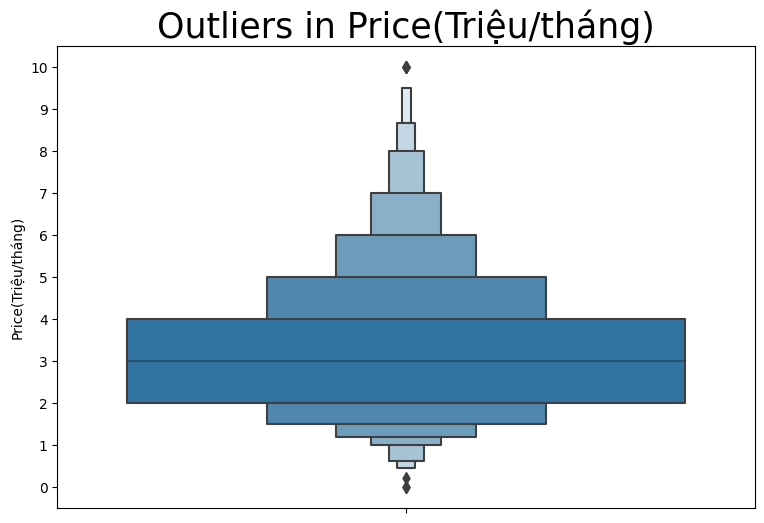

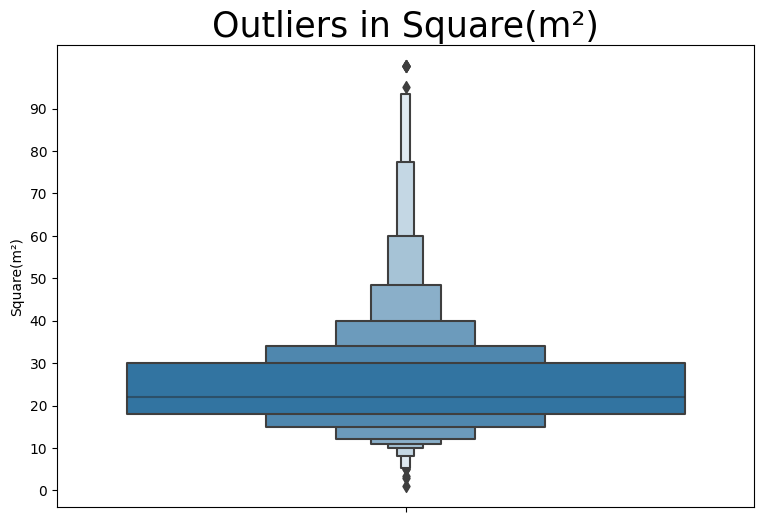

In [136]:
for col in num_vars:
    plt.figure(figsize=(9,6))
    sns.boxenplot(y=col,data=train_df_temp)
    plt.title('Outliers in {}'.format(col),fontsize=25,fontweight=5)
    if col == 'Price(Triệu/tháng)':
        plt.yticks(range(0,11,1))
    if col == 'Square(m²)':
        plt.yticks(range(0,100,10))
    plt.show()

Outliers ở giá nằm ở mức gần 10 triệu, ở diện tích nằm ở mức gần 100 và nằm dưới 5, ta sẽ loại những giá trị này để tránh ảnh hưởng

In [137]:

train_df_temp.drop(train_df_temp[train_df_temp['Price(Triệu/tháng)'] > 9.7].index, inplace = True)
train_df_temp.drop(train_df_temp[train_df_temp['Square(m²)'] > 95].index, inplace = True)
train_df_temp.drop(train_df_temp[train_df_temp['Square(m²)'] < 5].index, inplace = True)


## 2. Chọn các đặc trưng để xây dựng mô hình

### 2.1 Ta sẽ chuyển các cột dạng Categorical sang Numerical

Ta sẽ dùng hàm get_dummies để chuyển cột dạng Categorical sang Numerical theo phương pháp one hot encoding

Lý do dùng: Vì các cột dạng categorical không có dạng order (có thứ tự) nên dùng one hot encoding sẽ đem lại hiệu quả cao hơn so với phương pháp encoding khác

In [138]:

df_new = train_df_temp.drop(columns=['Id', 'Title', 'Price(Triệu/tháng)', 'Square(m²)'])

df_new = pd.get_dummies(df_new)
df_new['Price'] = train_df_temp['Price(Triệu/tháng)']
df_new['Square'] = train_df_temp['Square(m²)']
df_new

,District_Bình Chánh,District_Bình Thạnh,District_Bình Tân,District_Gò Vấp,District_Hóc Môn,District_Nhà Bè,District_Phú Nhuận,District_Quận 1,District_Quận 10,District_Quận 11,...,hasFurniture_no,hasFurniture_yes,isWholeHouse_no,isWholeHouse_yes,isLiveTogether_no,isLiveTogether_yes,isApartment_no,isApartment_yes,Price,Square
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,3.5,18.0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,3.3,25.0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,3.0,15.0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,7.0,27.0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1.7,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,2.5,20.0
1138,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,2.0,6.0
1139,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,2.9,22.0
1140,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,3.5,52.5


### 2.2 Bỏ đi những cột có tương quan thấp với giá

Đối với những cột có độ tương quan với giá thấp hơn 0.01 (không ảnh hưởng nhiều), ta sẽ bỏ đi.

In [139]:

corr_price = df_new.corr()['Price']
drop_columns = corr_price[abs(corr_price)<0.01].index
df_new.drop(columns = drop_columns,inplace = True)


Như vậy, ta sẽ sử dụng những đặc trưng như sau để xây dựng mô hình

In [140]:
df_new.drop(columns='Price').columns

Index(['District_Bình Chánh', 'District_Bình Thạnh', 'District_Bình Tân',
       'District_Gò Vấp', 'District_Hóc Môn', 'District_Nhà Bè',
       'District_Phú Nhuận', 'District_Quận 1', 'District_Quận 10',
       'District_Quận 11', 'District_Quận 12', 'District_Quận 2',
       'District_Quận 3', 'District_Quận 4', 'District_Quận 5',
       'District_Quận 6', 'District_Quận 7', 'District_Quận 9',
       'District_Thủ Đức', 'District_Tân Bình', 'District_Tân Phú', 'isNew_no',
       'isNew_yes', 'isNearCenter_no', 'isNearCenter_yes', 'hasFurniture_no',
       'hasFurniture_yes', 'isWholeHouse_no', 'isWholeHouse_yes',
       'isLiveTogether_no', 'isLiveTogether_yes', 'isApartment_no',
       'isApartment_yes', 'Square'],
      dtype='object')

## 3. Xây dựng mô hình

In [141]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import time

In [142]:
X = df_new.drop(columns=['Price'])
y = df_new['Price']

### 3.1 Chuẩn hoá dữ liệu

 Ta dùng phương pháp MinMaxScaler để scale dữ liệu về khoảng [0,1]
 
 Lý do dùng: vì tụi em đã xử lý các outliers và dữ liệu không theo dạng phân phối chuẩn.
 
 Tụi em cũng đã thử giữ lại các outliers, không bỏ đi các Feature và dùng phương pháp RobustScaler , tuy nhiên kết quả lại không tốt bằng. Vì thế nên quyết định dùng MinMaxScaler. 

In [143]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.14444444],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.22222222],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.11111111],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.18888889],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.52777778],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.14444444]])

### 3.2 Chia các tập train, test

Chia tập train/test với tỷ lệ là 75:25

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)


### 3.3 Chọn các mô hình tốt nhất

Ta sẽ dùng phương pháp K Fold Cross Validation để đánh giá và chọn ra các mô hình tốt nhất. Sau khi chạy thử với nhiều k thì tụi em chọn k=7 vì nó có hiệu quả tốt nhất.

Lý do dùng: Bởi vì tập dữ liệu khá nhỏ, nếu chia ra các tập train/val/test thì không thật sự đo được độ hiệu quả của mô hình (vì mỗi tập quá ít dữ liệu). Dùng K Fold Cross Validation thì mọi phần trong tập train sẽ được dùng cho cả việc train và test, nhờ đó ta sẽ đánh giá chính xác hơn độ hiệu quả của mô hình.

In [145]:
from sklearn.model_selection import cross_val_score

Ta sẽ chọn các thuật toán là LinearRegression, Ridge, Lasso, KNeighborsRegressor, RandomForestRegressor

In [146]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=7)
scores.mean().round(5)

0.44535

In [147]:
model = Ridge()
scores = cross_val_score(model, X_train, y_train, cv=7)
scores.mean().round(5)

0.49848

In [148]:
model = Lasso()
scores = cross_val_score(model, X_train, y_train, cv=7)
scores.mean().round(5)

-0.01677

In [149]:
model = KNeighborsRegressor()
scores = cross_val_score(model, X_train, y_train, cv=7)
scores.mean().round(5)

0.42382

In [150]:
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=7)
scores.mean().round(5)

0.4834

Ta sẽ chọn ra 3 mô hình có điểm cao nhất là LinearRegression, Ridge, RandomForestRegressor

### 3.4 Tiến hành huấn luyện mô hình

Cho các mô hình này lần lượt chạy trên tập train và test để đo độ hiệu quả của chúng.

Ta sẽ tính các giá trị đo độ lỗi như sau:

- MAE: lỗi trị tuyệt đối trung bình
- MSE: lỗi bình phương trung bình
- RMSE: sai số bình phương trung bình căn
- R2_score: mức độ phù hợp của mô hình với tập dữ liệu

======TRAIN======
Train error (MAE): 0.8189
Train error (MSE): 1.2054
Train error (RMSE): 1.09791
R2 score : 0.52322
======TEST======
Test error (MAE): 0.80014
Test error (MSE): 1.17199
Test error (RMSE): 1.08258
R2 score : 0.58085


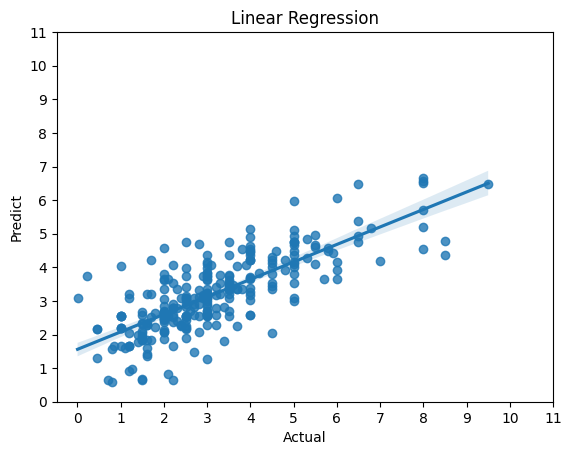

In [151]:
model = LinearRegression()
model.fit(X_train,y_train)

print("======TRAIN======")
y_pre_train = model.predict(X_train)
score_train = mean_absolute_error(y_train,y_pre_train).round(5)
mse_score = mean_squared_error(y_train,y_pre_train).round(5)
rmse = mean_squared_error(y_train,y_pre_train,squared = False).round(5)
score_r2 = r2_score(y_train,y_pre_train).round(5)
print("Train error (MAE): {}".format(score_train))
print("Train error (MSE): {}".format(mse_score))
print("Train error (RMSE): {}".format(rmse))
print("R2 score : {}".format(score_r2))
print("======TEST======")
y_pre_test = model.predict(X_test)
score_test = mean_absolute_error(y_test,y_pre_test).round(5)
mse_score = mean_squared_error(y_test,y_pre_test).round(5)
rmse = mean_squared_error(y_test,y_pre_test,squared = False).round(5)
score_r2 = r2_score(y_test,y_pre_test).round(5)
print("Test error (MAE): {}".format(score_test))
print("Test error (MSE): {}".format(mse_score))
print("Test error (RMSE): {}".format(rmse))
print("R2 score : {}".format(score_r2))
sns.regplot(x = y_test, y = y_pre_test)
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.xticks(range(0,12,1))
plt.yticks(range(0,12,1))
plt.show()

======TRAIN======
Train error (MAE): 0.7918
Train error (MSE): 1.16029
Train error (RMSE): 1.07717
R2 score : 0.54106
======TEST======
Test error (MAE): 0.79364
Test error (MSE): 1.15739
Test error (RMSE): 1.07582
R2 score : 0.58607


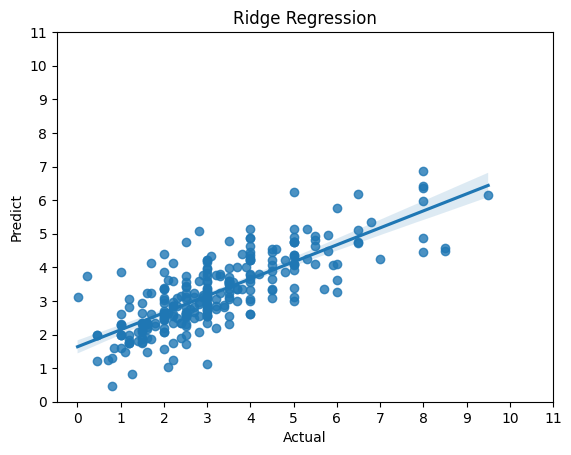

In [152]:
model = Ridge()
model.fit(X_train,y_train)

print("======TRAIN======")
y_pre_train = model.predict(X_train)
score_train = mean_absolute_error(y_train,y_pre_train).round(5)
mse_score = mean_squared_error(y_train,y_pre_train).round(5)
rmse = mean_squared_error(y_train,y_pre_train,squared = False).round(5)
score_r2 = r2_score(y_train,y_pre_train).round(5)
print("Train error (MAE): {}".format(score_train))
print("Train error (MSE): {}".format(mse_score))
print("Train error (RMSE): {}".format(rmse))
print("R2 score : {}".format(score_r2))
print("======TEST======")
y_pre_test = model.predict(X_test)
score_test = mean_absolute_error(y_test,y_pre_test).round(5)
mse_score = mean_squared_error(y_test,y_pre_test).round(5)
rmse = mean_squared_error(y_test,y_pre_test,squared = False).round(5)
score_r2 = r2_score(y_test,y_pre_test).round(5)
print("Test error (MAE): {}".format(score_test))
print("Test error (MSE): {}".format(mse_score))
print("Test error (RMSE): {}".format(rmse))
print("R2 score : {}".format(score_r2))
sns.regplot(x = y_test, y = y_pre_test)
plt.title('Ridge Regression')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.xticks(range(0,12,1))
plt.yticks(range(0,12,1))
plt.show()

Ta thấy ở trên tập train Linear và Ridge có R2_score thấp cùng độ lỗi cao nhưng khi cho chạy với tập test thì lại có kết quả tốt hơn cả train.

======TRAIN======
Train error (MAE): 0.41828
Train error (MSE): 0.34902
Train error (RMSE): 0.59078
R2 score : 0.86195
======TEST======
Test error (MAE): 0.75343
Test error (MSE): 1.0652
Test error (RMSE): 1.03209
R2 score : 0.61904


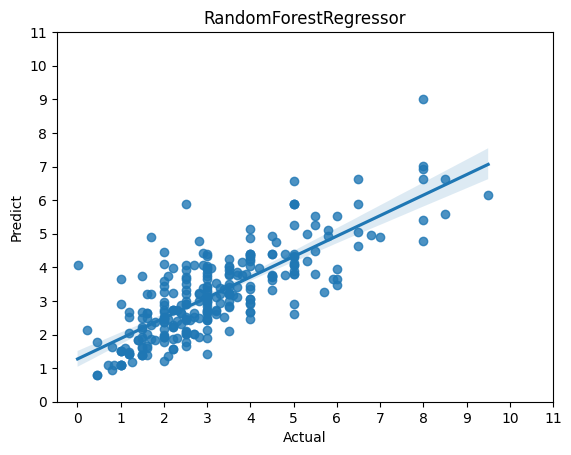

In [153]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

print("======TRAIN======")
y_pre_train = model.predict(X_train)
score_train = mean_absolute_error(y_train,y_pre_train).round(5)
mse_score = mean_squared_error(y_train,y_pre_train).round(5)
rmse = mean_squared_error(y_train,y_pre_train,squared = False).round(5)
score_r2 = r2_score(y_train,y_pre_train).round(5)
print("Train error (MAE): {}".format(score_train))
print("Train error (MSE): {}".format(mse_score))
print("Train error (RMSE): {}".format(rmse))
print("R2 score : {}".format(score_r2))
print("======TEST======")
y_pre_test = model.predict(X_test)
score_test = mean_absolute_error(y_test,y_pre_test).round(5)
mse_score = mean_squared_error(y_test,y_pre_test).round(5)
rmse = mean_squared_error(y_test,y_pre_test,squared = False).round(5)
score_r2 = r2_score(y_test,y_pre_test).round(5)
print("Test error (MAE): {}".format(score_test))
print("Test error (MSE): {}".format(mse_score))
print("Test error (RMSE): {}".format(rmse))
print("R2 score : {}".format(score_r2))
sns.regplot(x = y_test, y = y_pre_test)
plt.title('RandomForestRegressor')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.xticks(range(0,12,1))
plt.yticks(range(0,12,1))
plt.show()

RandomForestRegressor thì ngược lại, train đưa ra kết quả rất tốt nhưng thực tế lại đưa ra kết quả thấp hơn 20% so với lúc train (tuy nhiên vẫn cao hơn 2 mô hình kia). Mô hình này đã rơi vào trường hợp overfit.

Ta thử dùng phương pháp Stacking để kết hợp 3 model này lại để xem kết quả có tổt hơn không.

In [154]:
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.simplefilter('ignore')

In [159]:
lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge()
rfr = RandomForestRegressor()
svr_rbf = SVR(kernel='rbf')

======TRAIN======
Train error (MAE): 0.39745
Train error (MSE): 0.354
Train error (RMSE): 0.59498
R2 score : 0.85998
======TEST======
Test error (MAE): 0.80135
Test error (MSE): 1.20617
Test error (RMSE): 1.09826
R2 score : 0.56862


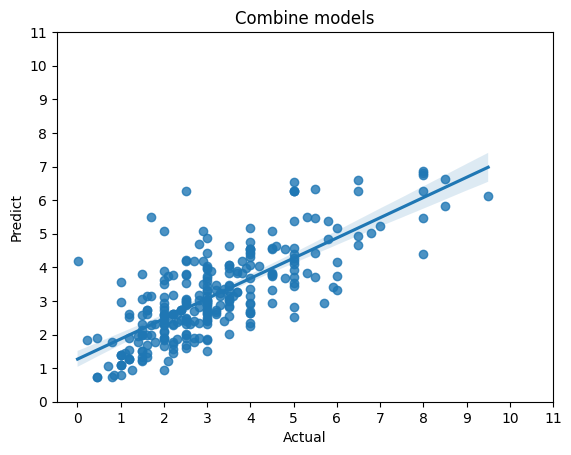

In [161]:
model = StackingRegressor(regressors=[svr_lin, lr, ridge,rfr], 
                           meta_regressor=svr_rbf)
model.fit(X_train,y_train)

print("======TRAIN======")
y_pre_train = model.predict(X_train)
score_train = mean_absolute_error(y_train,y_pre_train).round(5)
mse_score = mean_squared_error(y_train,y_pre_train).round(5)
rmse = mean_squared_error(y_train,y_pre_train,squared = False).round(5)
score_r2 = r2_score(y_train,y_pre_train).round(5)
print("Train error (MAE): {}".format(score_train))
print("Train error (MSE): {}".format(mse_score))
print("Train error (RMSE): {}".format(rmse))
print("R2 score : {}".format(score_r2))
print("======TEST======")
y_pre_test = model.predict(X_test)
score_test = mean_absolute_error(y_test,y_pre_test).round(5)
mse_score = mean_squared_error(y_test,y_pre_test).round(5)
rmse = mean_squared_error(y_test,y_pre_test,squared = False).round(5)
score_r2 = r2_score(y_test,y_pre_test).round(5)
print("Test error (MAE): {}".format(score_test))
print("Test error (MSE): {}".format(mse_score))
print("Test error (RMSE): {}".format(rmse))
print("R2 score : {}".format(score_r2))
sns.regplot(x = y_test, y = y_pre_test)
plt.title('Combine models')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.xticks(range(0,12,1))
plt.yticks(range(0,12,1))
plt.show()

Ta thấy kết quả train thì tốt nhưng kết quả lúc chạy tập test thì khá tệ (như RandomForestRegressor ), chỉ cỡ 57%. Có vẻ cũng đã xuất hiện hiện tượng overfit trên mô hình này

## 4. Kết luận

Nhìn chung, cả 3 mô hình được chọn để xây dựng: Linear Regression, Ridge, Random Forest và kể cả phương pháp Ensemble(stacking) kết hợp nhiều mô hình nhưng vẫn chỉ cho R2-score ở mức 0.5. Chưa đạt kì vọng ban đầu nhóm đề ra. Nguyên nhân chủ quan có thể là do ở dữ liệu ít, thiếu đặc trưng và các đặc trưng được chọn để xây dựng mô hình tương quan ít với giá. Nguyên nhân khách quan là do giá nhà ở trang web thu thập cung cấp thông tin chưa thực sự sát với thị trường, còn mang nhiều sự cảm tính, và biến động giá nhà ở Việt Nam là rất lớn.

Các phương án chạy mô hình:
-	Phương án 1: Nhóm đã quyết định giữ lại nhiễu, sau đó chuẩn hóa dữ liệu bằng phương pháp Robust Scaler. Nhưng cho kết quả khá tháp với điểm R2_score chỉ tầm 0.3-0.4.
-	Phương án 2: Nhóm loại bỏ nhiễu bằng cách quan sát biểu đồ, và loại bỏ nhiễu bằng thủ công. Chuẩn hoá dữ liệu bằng MinMaxScaler sau đó cho chạy trên 3 mô hình: Linear Regression, Ridge, Random Forest thì cho kết quả ở mức R2 là khoảng 0.5. Sau đó nhóm áp dụng phương pháp Ensemble cho chạy kết hợp nhiều mô hình.

Về kết quả:
-  Mô hình Linear và Ridge có kết quả chạy trên tập train thì tệ, chỉ khoảng 0.52 đến 0.54 nhưng ở trên tập test thì lại rất tốt khi điểm tăng lên hơn 0.58. Tuy nhiên không thể kết luận là mô hình này chạy tốt khi tập dữ liệu test khá ít và các độ lỗi MSE, MAE ,RMSE là gần như không thay đổi trên cả 2 tập train và test.
- Mô hình Random Forest có kết quả train khá tốt khi R2 lên tới hơn 0.86 và các chỉ số lỗi cũng khá thấp. Tuy nhiên, khi cho chạy trên tập test thì R2 giảm hơn 0.2 điểm, xuống mức gần 0.62, các độ lỗi thì tăng gấp đôi. Điều này cho thấy mô hình này đã bị overfitting.
- Mô hình kết hợp của Linear Regression, Ridge, Random Forest cho kết quả khá là tương tự với Random Forest trên tập train các chỉ số đều cho kết quả rất tốt. Nhưng khi chạy trên tập test thì mô hình này lại cho kết quả tệ nhất trong số tất cả các mô hình khi R2 chỉ xấp xỉ 0.57, còn các chỉ số lỗi cũng là lớn nhất. Mô hình này cũng đã xuất hiện tượng overfitting.
